# Spectral Analysis of Deterministic Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Zero-Padding

### Concept

Let's assume a signal $x_N[k]$ of finite length $N$, for instance a windowed signal $x_N[k] = x[k] \cdot \text{rect}_N[k]$. The discrete Fourier transformation (DFT) of $x_N[k]$ reads

\begin{equation}
X_N[\mu] = \sum_{k=0}^{N-1} x_N[k] \; w_N^{\mu k}
\end{equation}

where $w_N = \mathrm{e}^{-\mathrm{j} \frac{2 \pi}{N}}$ denotes the kernel of the DFT. For a sampled time-domain signal, the distance in frequency between two neighboring coefficients is given as $\Delta f = \frac{f_s}{N}$, where $f_s = \frac{1}{T}$ denotes the sampling frequency. Hence, if $N$ is increased the distance between neighboring frequencies is decreased. This leads to the concept of zero-padding in spectral analysis. Here the signal $x_N[k]$ of finite length is filled up with (M-N) zero values to a total length $M \geq N$

\begin{equation}
x_M[k] = \begin{cases}
x_N[k] & \mathrm{for} \; k=0,1,\dots,N-1 \\
0 & \mathrm{for} \; k=N,N+1,\dots,M-1
\end{cases}
\end{equation}

Appending zeros does not change the contents of the signal itself. However, the DFT $X_M[\mu]$ of $x_M[k]$ has now a decreased distance between neighboring frequencies $\Delta f = \frac{f_s}{M}$.

The question arises what influence zero-padding has on the spectrum and if it can enhance spectral analysis. On first sight it seems that the frequency resolution is higher, however do we get more information on the signal? In order to discuss this, a short numerical example is evaluated followed by a derivation of the mathematical relations between the spectrum $X_M[k]$ with zero-padding and $X_N[k]$ without zero-padding.

#### Example

The following example computes and plots the magnitude spectra $|X[\mu]|$ of a truncated complex exponential signal $x_N[k] = \mathrm{e}^{\,\mathrm{j}\,\Omega_0\,k} \cdot \text{rect}_N[k]$ and its zero-padded version $x_M[k]$.

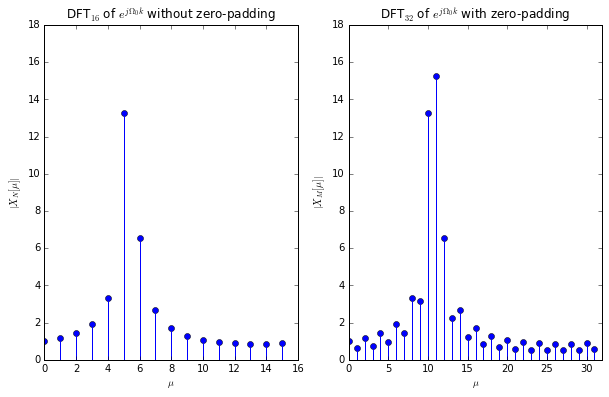

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 16  # length of the signal
M = 32  # length of zero-padded signal
Om0 = 5.33*(2*np.pi/N)  # frequency of exponential signal


# DFT of the exponential signal
xN = np.exp(1j*Om0*np.arange(N))
XN = np.fft.fft(xN)
# DFT of the zero-padded exponential signal
xM = np.concatenate((xN, np.zeros(M-N)))
XM = np.fft.fft(xM)


# plot spectra
plt.figure(figsize = (10, 6))

plt.subplot(121)
plt.stem(np.arange(N),np.abs(XN))
plt.title(r'DFT$_{%d}$ of $e^{j \Omega_0 k}$ without zero-padding' %N)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_N[\mu]|$')
plt.axis([0, N, 0, 18])

plt.subplot(122)
plt.stem(np.arange(M),np.abs(XM))
plt.title(r'DFT$_{%d}$ of $e^{j \Omega_0 k}$ with zero-padding' %M)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_M[\mu]|$')
plt.axis([0, M, 0, 18]);

**Exercise**

* Check the two spectra carefully for relations. Are there common coefficients for the case $M = 2 N$?
* Increase the length `M` of the zero-padded signal $x_M[k]$. Can you gain additional information from the spectrum?

### Interpolation of the Discrete Fourier Transformation

Lets step back to the discrete-time Fourier transformation (DTFT) of the finite-length signal $x_N[k]$ without zero-padding

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k = -\infty}^{\infty} x_N[k] \, \mathrm{e}^{\,-\mathrm{j}\,\Omega\,k} = \sum_{k=0}^{N-1} x_N[k] \,\mathrm{e}^{-\,\mathrm{j}\,\Omega\,k}
\end{equation}

The discrete Fourier transformation (DFT) is derived by sampling $X_N(\mathrm{e}^{\mathrm{j}\,\Omega})$ at $\Omega = \mu \frac{2 \pi}{N}$

\begin{equation}
X_N[\mu] = X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) \big\vert_{\Omega = \mu \frac{2 \pi}{N}} = \sum_{k=0}^{N-1} x_N[k] \, \mathrm{e}^{\,-\mathrm{j}\, \mu \frac{2\pi}{N}\,k}
\end{equation}

Since the DFT coefficients $X_N[\mu]$ are sampled equidistantly from the DTFT $X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega})$, we can reconstruct the DTFT of $x_N[k]$ from the DFT coefficients by interpolation. Introduce the inverse DFT of $X_N[\mu]$

\begin{equation}
x_N[k] = \frac{1}{N} \sum_{\mu = 0}^{N-1} X_N[\mu] \; \mathrm{e}^{\,\mathrm{j}\,\frac{2 \pi}{N} \mu \,k}
\end{equation}

into the DTFT

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k=0}^{N-1} x_N[k] \; \mathrm{e}^{-\,\mathrm{j}\, \Omega\, k} = 
\sum_{\mu=0}^{N-1} X_N[\mu] \cdot \frac{1}{N} \sum_{k=0}^{N-1} \mathrm{e}^{-\mathrm{j}\, k \,(\Omega - \frac{2 \pi}{N} \mu)}
\end{equation}

reveals the relation between $X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and $X_N[\mu]$. The last sum can be solved analytically yielding the so called periodic sinc function (aliased sinc function, [Dirichlet kernel](https://en.wikipedia.org/wiki/Dirichlet_kernel)) $\text{psinc}_N(\Omega)$ and a phase shift. This results in

\begin{equation}
X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) =  \sum_{\mu=0}^{N-1} X_N[\mu] \cdot \mathrm{e}^{-\,\mathrm{j}\, \frac{( \Omega - \frac{2 \pi}{N} \mu ) (N-1)}{2}} \cdot \text{psinc}_N ( \Omega - \frac{2 \pi}{N} \mu )
\end{equation}

where

\begin{equation}
\text{psinc}_N (\Omega) = \frac{1}{N} \frac{\sin(\frac{N}{2} \Omega)}{  \sin(\frac{1}{2} \Omega)}
\end{equation}

denotes the $N$-th order periodic sinc function.

#### Example

This example illustrates the interpolation of $X_N[\mu]$ using the relation derived above. Using above definition, the periodic sinc function is not defined at $\Omega = 2 \pi \,n$ for $n \in \mathbb{Z}$. This is resolved by taking its limit value.

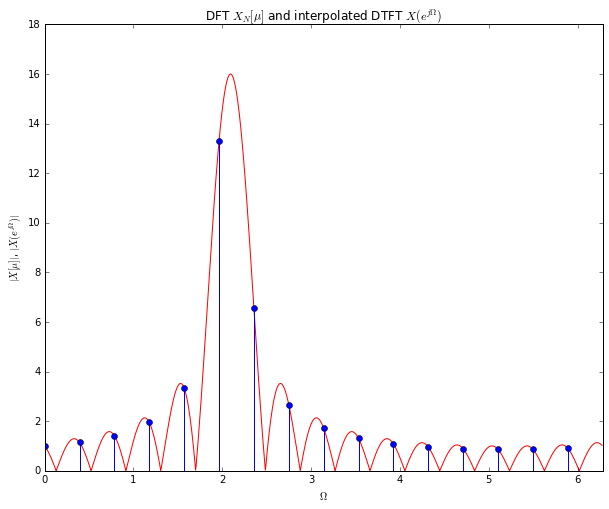

In [2]:
N = 16  # length of the signal
M = 1024  # number of frequency points for DTFT
Om0 = 5.33*(2*np.pi/N)  # frequency of exponential signal


# periodic sinc function
def psinc(x, N):
    x = np.asanyarray(x)
    y = np.where(x == 0, 1.0e-20, x)
    return 1/N * np.sin(N/2*y)/np.sin(1/2*y)

# DFT of the exponential signal
xN = np.exp(1j*Om0*np.arange(N))
XN = np.fft.fft(xN)

# interpolation of DTFT from DFT coefficients
Xi = np.asarray(np.zeros(M), dtype=complex)
for mu in np.arange(M):
    Omd = 2*np.pi/M*mu-2*np.pi*np.arange(N)/N
    interpolator = psinc(Omd, N) * np.exp(-1j*Omd*(N-1)/2)
    Xi[mu] = np.sum(XN * interpolator)

# plot spectra
plt.figure(figsize = (10, 8))
plt.hold(True)

plt.plot(np.arange(M)*2*np.pi/M, abs(Xi), 'r')
plt.stem(np.arange(N)*2*np.pi/N, abs(XN))
plt.title(r'DFT $X_N[\mu]$ and interpolated DTFT $X(e^{j \Omega})$')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|X[\mu]|$, $|X(e^{j \Omega})|$')
plt.axis([0, 2*np.pi, 0, 18]);

### Relation between Discrete Fourier Transformations with and without Zero-Padding

It was already outlined above that the DFT is related to the DTFT by sampling. Since the zero-padded signal $x_M[k]$ differs to $x_N[k]$ only with respect to the additional zeros, its DFT $X_M[\mu]$ is given by resampling the interpolated DTFT $X_N(\mathrm{e}^{\mathrm{j}\, \Omega})$ at $\Omega = \frac{2 \pi}{M} \mu$

\begin{equation}
X_M[\mu] =  \sum_{\eta=0}^{N-1} X_N[\eta] \cdot \mathrm{e}^{\,-\mathrm{j}\, \frac{( \frac{2 \pi}{M} \mu - \frac{2 \pi}{N} \eta ) (N-1)}{2}} \cdot \text{psinc}_N \left( \frac{2 \pi}{M} \mu - \frac{2 \pi}{N} \eta \right)
\end{equation}

for $\mu = 0, 1, \dots, M-1$.

Above equation relates the spectrum $X_N[\mu]$ of the original signal $x_N[k]$ to the spectrum $X_M[\mu]$ of the zero-padded signal $x_M[k]$. It essentially constitutes a bandlimited interpolation of the coefficients $X_N[\mu]$.

All spectral information of a signal of finite length $N$ is already contained in its spectrum derived from a DFT of length $N$. By applying zero-padding and a longer DFT, the frequency resolution is only virtually increased. The additional coefficients are related by bandlimited interpolation to the original ones. In general, zero-padding does not bring a benefit in spectral analysis. It may bring a benefit in special applications, for instance when estimating the frequency of an isolated harmonic signal from its spectrum.

#### Example

The following example shows that the coefficients $X_M[\mu]$ of the spectrum after zero-padding can be derived from the spectrum $X_N[\mu]$ by interpolation.

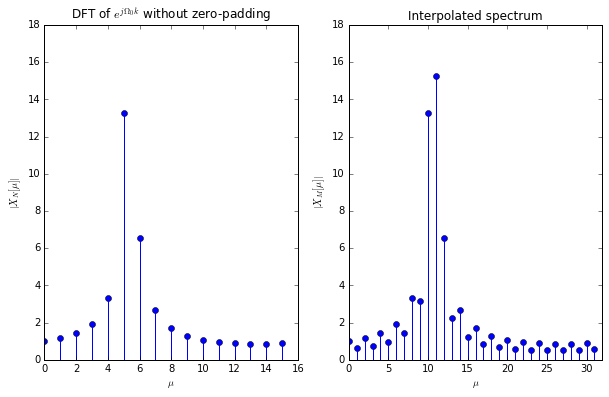

In [3]:
N = 16  # length of the signal
M = 32  # number of points for interpolated DFT
Om0 = 5.33*(2*np.pi/N)  # frequency of exponential signal


# periodic sinc function
def psinc(x, N):
    x = np.asanyarray(x)
    y = np.where(x == 0, 1.0e-20, x)
    return 1/N * np.sin(N/2*y)/np.sin(1/2*y)

# DFT of the exponential signal
xN = np.exp(1j*Om0*np.arange(N))
XN = np.fft.fft(xN)

# interpolation of DFT coefficients
XM = np.asarray(np.zeros(M), dtype=complex)
for mu in np.arange(M):
    Omd = 2*np.pi/M*mu-2*np.pi*np.arange(N)/N
    interpolator = psinc(Omd, N) * np.exp(-1j*Omd*(N-1)/2)
    XM[mu] = np.sum(XN * interpolator)

# plot spectra
plt.figure(figsize = (10, 6))

plt.subplot(121)
plt.stem(np.arange(N),np.abs(XN))
plt.title(r'DFT of $e^{j \Omega_0 k}$ without zero-padding')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_N[\mu]|$')
plt.axis([0, N, 0, 18])

plt.subplot(122)
plt.stem(np.arange(M),np.abs(XM))
plt.title(r'Interpolated spectrum')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_M[\mu]|$')
plt.axis([0, M, 0, 18]);

**Exercise**

* Compare the interpolated spectrum to the spectrum with zero padding from the first example.
* Estimate the frequency $\Omega_0$ of the exponential signal from the interpolated spectrum. How could you further increase the accuracy of your estimate?

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016*.